In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data= "data/mouse_drug_data.csv"
clinical_trial_data= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv(mouse_drug_data)
clinical_trial=pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
mouse_clinical_merge=pd.merge(clinical_trial,mouse_drug,how="left",on="Mouse ID")

# Display the data table for preview
mouse_clinical_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group=mouse_clinical_merge.groupby(["Drug","Timepoint"])
tumor_mean=tumor_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_data=pd.DataFrame({"Tumor Volume (mm3)":tumor_mean})
tumor_mean_data.reset_index(inplace=True)

# Preview DataFrame
tumor_mean_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error=tumor_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_error_data=pd.DataFrame({"Tumor Volume (mm3)":tumor_error})
tumor_error_data.reset_index(inplace=True)

# Preview DataFrame
tumor_error_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_table=tumor_mean_data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
error_table=tumor_error_data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
error_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


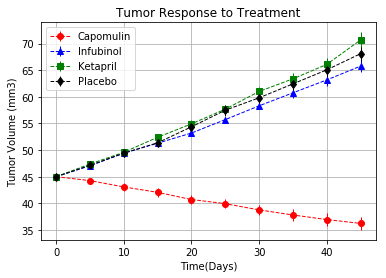

In [6]:
# Generate the Plot (with Error Bars) for the four drugs
capomulin_plot=mean_table["Capomulin"]
capomulin_plot.plot(grid=True,linewidth=1,color="r", marker='o', linestyle='dashed',yerr=(error_table["Capomulin"]))

infubinol_plot=mean_table["Infubinol"]
infubinol_plot.plot(grid=True, linewidth=1,color="b",marker="^",linestyle='dashed',yerr=(error_table["Infubinol"]))

ketapril_plot=mean_table["Ketapril"]
ketapril_plot.plot(grid=True, linewidth=1,color="g",marker="s",linestyle='dashed',yerr=(error_table["Ketapril"]))

Placebo_plot=mean_table["Placebo"]
Placebo_plot.plot(grid=True, linewidth=1,color="black",marker="d",linestyle='dashed',yerr=(error_table["Placebo"]))

plt.legend()
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("Images/tumor_mean.png")

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
met_group=mouse_clinical_merge.groupby(["Drug","Timepoint"])
met_mean=met_group["Metastatic Sites"].mean()

# Convert to DataFrame
met_mean_data=pd.DataFrame({"Metastatic Sites":met_mean})


# Preview DataFrame
met_mean_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error=met_group["Metastatic Sites"].sem()

# Convert to DataFrame
met_error_data=pd.DataFrame({"Metastatic Sites":met_error})


# Preview DataFrame
met_error_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_data.reset_index(inplace=True)
met_mean_table=met_mean_data.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_mean_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_error_data.reset_index(inplace=True)
met_error_table=met_error_data.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_error_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


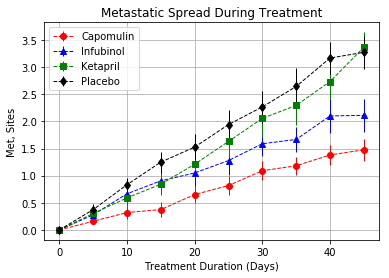

In [11]:
# Generate the Plot (with Error Bars)for the 4 drugs
capomulin_met_plot=met_mean_table["Capomulin"]
capomulin_met_plot.plot(grid=True,linewidth=1,color="r", marker='o', linestyle='dashed',yerr=(met_error_table["Capomulin"]))

infubinol_met_plot=met_mean_table["Infubinol"]
infubinol_met_plot.plot(grid=True, linewidth=1,color="b",marker="^",linestyle='dashed',yerr=(met_error_table["Infubinol"]))

ketapril_met_plot=met_mean_table["Ketapril"]
ketapril_met_plot.plot(grid=True, linewidth=1,color="g",marker="s",linestyle='dashed',yerr=(met_error_table["Ketapril"]))

Placebo_met_plot=met_mean_table["Placebo"]
Placebo_met_plot.plot(grid=True, linewidth=1,color="black",marker="d",linestyle='dashed',yerr=(met_error_table["Placebo"]))

plt.legend()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met, Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("Images/met_mean.png")

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=tumor_group["Mouse ID"].count()

# Convert to DataFrame
mouse_count_data=pd.DataFrame({"Mouse ID":mouse_count})
mouse_count_data.reset_index(inplace=True)

# Preview DataFrame
mouse_count_data.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_table=mouse_count_data.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked
mouse_count_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


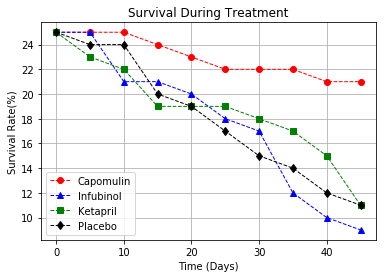

In [14]:
# Generate the Plot (Accounting for percentages)for the 4 drugs
capomulin_mouse_plot=mouse_count_table["Capomulin"]
capomulin_mouse_plot.plot(grid=True,linewidth=1,color="r", marker='o', linestyle='dashed')

infubinol_mouse_plot=mouse_count_table["Infubinol"]
infubinol_mouse_plot.plot(grid=True, linewidth=1,color="b",marker="^",linestyle='dashed')

ketapril_mouse_plot=mouse_count_table["Ketapril"]
ketapril_mouse_plot.plot(grid=True, linewidth=1,color="g",marker="s",linestyle='dashed')

Placebo_mouse_plot=mouse_count_table["Placebo"]
Placebo_mouse_plot.plot(grid=True, linewidth=1,color="black",marker="d",linestyle='dashed')

plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("Images/mouse_survival.png")
# Show the Figure
plt.show()

In [15]:
# Calculate the percent changes for each drug
#put the name of the drugs in a list
drugs=mean_table.columns
change=[]

# loop through drug list and calculate the percent change in each drug
for drug in drugs:
    
    day0=tumor_mean_data.loc[(tumor_mean_data["Drug"]==drug) & 
                             (tumor_mean_data["Timepoint"]==0),
                             "Tumor Volume (mm3)"].sum()
    day45=tumor_mean_data.loc[(tumor_mean_data["Timepoint"]==45) &
                              (tumor_mean_data["Drug"]==drug),
                              "Tumor Volume (mm3)" ].sum()
    
    drug_change=((day45-day0)/day0)*100
    change.append(drug_change)

# Display the data to confirm
change_table=pd.DataFrame({"Drug":drugs,"Change":change})
change_table

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


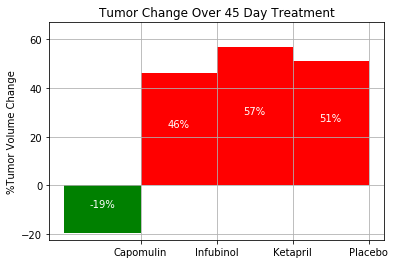

In [16]:
# Slice the data between passing and failing drugs
pass_drug=change_table.loc[(change_table["Drug"]=="Capomulin")] 
fail_drug=change_table.loc[(change_table["Drug"]=="Infubinol") |
                            (change_table["Drug"]=="Ketapril") |
                            (change_table["Drug"]=="Placebo") ]

# Orient widths. Add labels, tick marks, etc.
fig, ax = plt.subplots()

ax.set_ylim(min(change_table["Change"]), max(change_table["Change"])+10)

x=np.arange(-0.4,3,0.8)
width=0.8
ax.grid()
ax.set_xticks(np.arange(0.4,3,0.8)) 
ax.set_xticks(x + width )
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_yticks(np.arange(-20,max(change_table["Change"])+10,20)) 

ax.set_ylabel("%Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes and creat the bars
pass_bar=ax.bar(np.arange(0,len(pass_drug["Drug"]),10),pass_drug["Change"],color="g")
fail_bar=ax.bar(np.arange(0.8,len(fail_drug["Drug"]),0.8),fail_drug["Change"],color="r")

def barlabel(bars):
    """
    Attach a text label inside each bar displaying its height
    """
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%d%%' % int(height),
                ha='center', va='bottom',color="white")
    
# Call functions to implement the function calls
barlabel(pass_bar)
barlabel(fail_bar)

# Save the Figure
plt.savefig("Images/change_bar.png")

# Show the Figure
fig.show()